In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
N0_file = "cache/_N0/N0_my_Planck_14_14_TQU.npy"
M_path = "cache/_M/"

In [3]:
fisher = Fisher(N0_file)
#fisher.setup_bispectra(M_path)

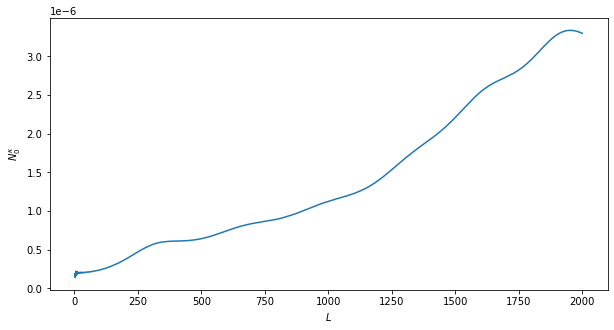

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [5]:
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
dL = 1
Ntheta = 10
f_skys = [0.7, 0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_Planck", "my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]

In [5]:
# Vectorised method
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky)
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


my_Planck
S/N = 0.06722782420707157
---------------------------
my_SA
S/N = 0.4226410067147236
---------------------------
my_SPT
S/N = 0.4928470602640161
---------------------------
my_S4
S/N = 3.250659254517087
---------------------------
my_S5
S/N = 7.245448316007239
---------------------------
my_SO
S/N = 1.506048321995421
---------------------------
Time = 510.0412402153015


In [23]:
# Array method
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_conv_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.0672278242070715
---------------------------
my_SA
S/N = 0.4226410067147248
---------------------------
my_SPT
S/N = 0.4928470602640167
---------------------------
my_S4
S/N = 3.25065925451709
---------------------------
my_S5
S/N = 7.245448316007231
---------------------------
my_SO
S/N = 1.5060483219954193
---------------------------
Time = 1599.8199470043182


In [ ]:
# Increase dL -> 10
# Array method
dL = 10
t0 = time.time()
fisher.setup_bispectra(M_path)
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_conv_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.0672440794279386
---------------------------
my_SA
S/N = 0.42234988355890135
---------------------------
my_SPT
S/N = 0.49251032601625316
---------------------------


In [13]:
# Increase Ntheta -> 100
# Array method
dL = 1
Ntheta = 100
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
    print(exp)
    print(f"S/N = {np.sqrt(np.sum(F_conv_rot))}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.06722778155269574
---------------------------
my_SA
S/N = 0.4226405945728156
---------------------------
my_SPT
S/N = 0.4928468942344158
---------------------------
my_S4
S/N = 3.2506582383449745
---------------------------
my_S5
S/N = 7.245446935987755
---------------------------
my_SO
S/N = 1.506047585564342
---------------------------
Time = 1822.4922451972961


Time = 58.07329988479614


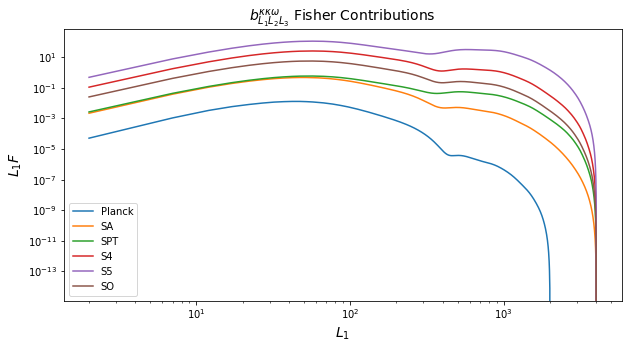

In [15]:
# Increase dL -> 5
# Array method
dL = 5
Ntheta = 10
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    Ls_rot, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    plt.loglog(Ls_rot, Ls_rot*F_conv_rot, label=f"{exp[3:]}")
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Fisher Contributions", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$L_1F$", fontsize=14)
plt.legend()
plt.show()

Time = 58.24649000167847


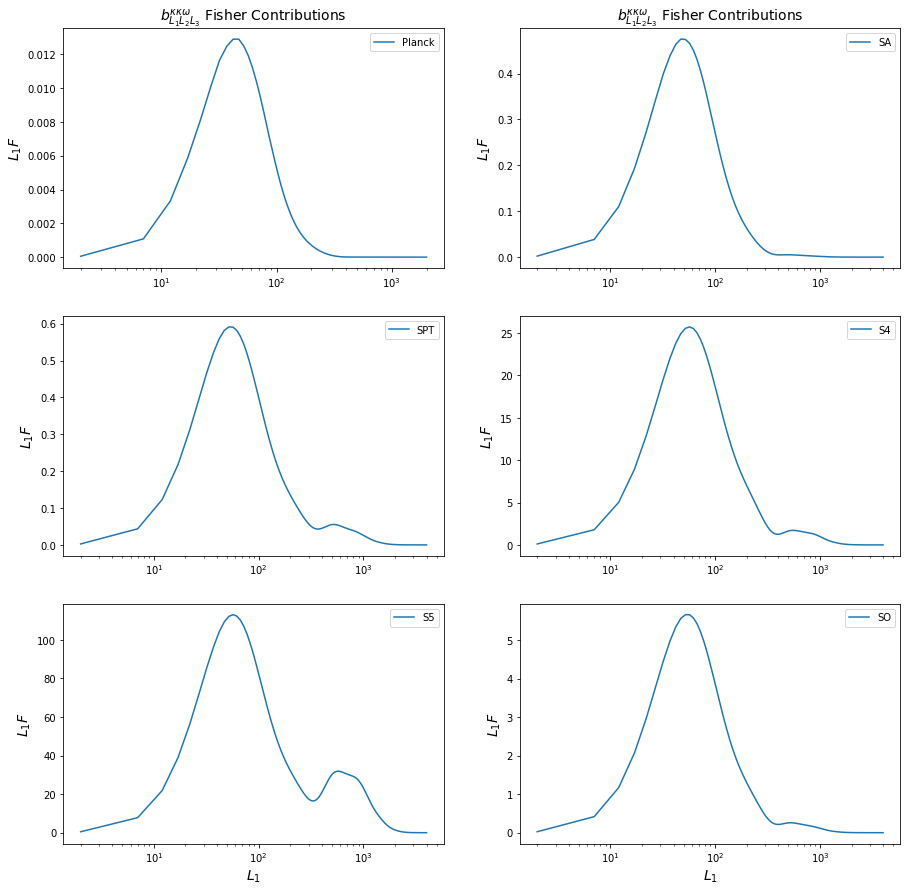

In [16]:
# Increase dL -> 10
# Array method
dL = 5
t0 = time.time()
fig, ax = plt.subplots(3,2, figsize=[15, 15])
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    Ls_rot, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmaxs[iii], dL, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    row = iii//2
    if iii % 2: col = 1
    else: col = 0
    ax[row][col].semilogx(Ls_rot, Ls_rot*F_conv_rot, label=f"{exp[3:]}")
    ax[row][col].set_ylabel("$L_1F$", fontsize=14)
    ax[row][col].legend()
    if row == 0:
        ax[row][col].set_title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Fisher Contributions", fontsize=14)
    elif row == 2:
        ax[row][col].set_xlabel("$L_1$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.show()

In [9]:
def get_Ls(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

In [10]:
# Sample method
# S5 at different Nells
N0_file = "cache/_N0/N0_my_S5_14_14_TQU.npy"
fisher.reset_noise(N0_file)
Lmax = 4000
Nells = np.array([10, 100, 200, 500, 1000])
Ntheta = 10
f_sky = 0.5
for Nell in Nells: 
    L1s = get_Ls(Lmax, Nell)
    t0 = time.time()
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=L1s, Ntheta=Ntheta, f_sky=f_sky)
    t1 = time.time()
    print("----------------------")
    print(f"Nell = {Nell}")
    print(f"F = {F_conv_rot}")
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print(f"Time = {t1 - t0}")

----------------------
Nell = 10
F = 17.293264422815092
S/N = 4.158517094207392
Time = 0.08282804489135742
----------------------
Nell = 100
F = 51.08352196514416
S/N = 7.147273743543349
Time = 0.20605707168579102
----------------------
Nell = 200
F = 51.85446792854583
S/N = 7.201004647168743
Time = 0.5661337375640869
----------------------
Nell = 500
F = 52.291617498508394
S/N = 7.231294316960719
Time = 3.067661762237549
----------------------
Nell = 1000
F = 52.432783892698495
S/N = 7.241048535446955
Time = 11.991801023483276


In [11]:
# Sample method
# Nell -> 500
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
Nell = 500
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    f_sky = f_skys[iii]
    Ls = get_Ls(Lmaxs[iii], Nell)
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)    
    print(exp)
    print(f"S/N = {np.sqrt(F_conv_rot)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
S/N = 0.06692947158231621
---------------------------
my_SA
S/N = 0.4209666156621792
---------------------------
my_SPT
S/N = 0.49141272285913384
---------------------------
my_S4
S/N = 3.242314436433852
---------------------------
my_S5
S/N = 7.231294316960719
---------------------------
my_SO
S/N = 1.5014345659883974
---------------------------
Time = 18.294419050216675


92.0
114.8
173.6
170.0
523.7818181818182
149.6
Time = 18.76838707923889


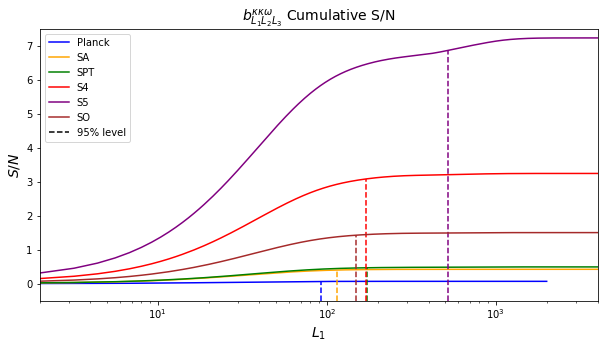

In [17]:
# Sample method
# Nell -> 500
Nells = 500
level = 0.95
colors = ["blue", "orange", "green", "red", "purple", "brown"]
t0 = time.time()
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    Ls = get_Ls(Lmaxs[iii], Nells)
    F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_skys[iii], arr=True)
    SNs = np.sqrt(np.cumsum(F_conv_rot))
    plt.semilogx(Ls, SNs, label=f"{exp[3:]}", color=colors[iii])
    SN = SNs[-1]
    L_level = Ls[SNs < level*SN][-1]
    print(L_level)
    L_level_index = np.where(Ls==L_level)[0][0]
    L_levels = np.array([L_level, L_level])
    SN_levels = np.array([-0.5, SNs[L_level_index]])
    plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.title("$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(-0.5, 7.5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

In [6]:
Lmaxs = [2000, 4000, 4000, 4000, 4000, 4000]
f_skys = [0.7, 0.65, 0.06, 0.4, 0.5, 0.4]
exps = ["my_Planck", "my_SA", "my_SPT", "my_S4", "my_S5", "my_SO"]
t0 = time.time()
fisher.reset_M_spline("cache/_M/kappa-kappa/20000_1000/ells.npy", "cache/_M/kappa-kappa/20000_1000/M.npy")
for iii, exp in enumerate(exps):
    N0_file = f"cache/_N0/N0_{exp}_14_14_TQU.npy"
    fisher.reset_noise(N0_file)
    F = fisher.get_rotation_ps_Fisher(Lmaxs[iii], f_skys[iii], auto=True)
    print(exp)
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmaxs[iii], f_skys[iii], auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

my_Planck
Auto ps S/N = 0.005290925389452552
Cross ps S/N = 3.120023449254522
---------------------------
my_SA
Auto ps S/N = 0.037070558302426934
Cross ps S/N = 10.515118278578163
---------------------------
my_SPT
Auto ps S/N = 0.06481565707662339
Cross ps S/N = 8.21486566315363
---------------------------
my_S4
Auto ps S/N = 0.6827698568257573
Cross ps S/N = 35.37734492657769
---------------------------
my_S5
Auto ps S/N = 2.3201862073177604
Cross ps S/N = 78.92587983663974
---------------------------
my_SO
Auto ps S/N = 0.20757108108020303
Cross ps S/N = 20.7935976047498
---------------------------
Time = 184.83972716331482
